# CS 533 Assignment 0

This is the 0th assignment for CS 533, *Introduction to Data Science*.  It is due **Sunday, Aug. 28, at 11:59 pm**.
To download this notebook from its view in the course web site, hover over the *Download* menu (the down arrow in the upper right), and choose `.ipynb`.

The purpose of this lab is to make sure that you can run Python notebooks and successfully submit an assignment.

Keep the following in mind for **all** notebooks you develop:

1. Structure your notebook. Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
2. Make sure your notebook can always be rerun from top to bottom.

For this notebook, I am actually giving you the answers - the PDF accompanying this assignment contains the code to enter in each of the cells below.  I want you to work through the process of entering, running, and submitting code before you need to worry about how to write it, so we can focus on learning one thing at a time. For the next assignment, when you need to write your own code, you've already been through the mechanics.

## Submission Instructions

To submit this lab, submit your `.ipynb` file along with a PDF version to Canvas.  Create the PDF version by using your browser's Print feature and printing to a PDF.

Your submitted notebook **must include results**.  I recommend that you submit after a clean run: select the 'Kernel' menu and choose 'Restart and Run All'.  This will also help you test requirement (2) above: that the notebook can be rerun from top to bottom.

## Setup

I usually start my notebooks with a *Setup* section that loads the relevant Python modules and does any configuration needed for the notebook to work.

Almost all projects will need basic data analysis packages - Pandas and Seaborn:

In [2]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as smf


For other projects, you will need some more imports:

```python
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
```

These are not necessary for this lab.

## Load the Data

After initializing the Python database, we load the data.

### Obtaining the Data File

Note that I did not provide the data file for you.  I want you to get used to downloading data files, so you learn where they come from.

**Download the Capital Bike Share data set** from <https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset>.  Click 'Data Folder', download the zip file, and extract the `day.csv` file.

### Reading the Data File

We will use the Pandas [read_csv][] function.  Our data file does not have column headers, so we need to specify the names.

[read_csv]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [67]:
data_path = "../data/bike/day.csv"
data = pd.read_csv(data_path)

Immediately after loading a data frame, I usually include a command to provide a brief preview of the data.  There are two good ways to do this.  The first is to use `head` to show the first few rows of the table:

In [60]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Sat
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sun
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Mon
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tue
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wed


The other good way is to use `info` to show a description of the columns, along with the shape and memory use of the data frame:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Note:**  I usually include the `.info()` or `.head()` call in the same cell as the data load. I separate them out in this notebook so that I can discuss them in the markdown cells, but future notebooks will include them together.

## Plotting the Data

Let's make a bar plot showing the mean number of riders per weekday:

<Figure size 1000x600 with 0 Axes>

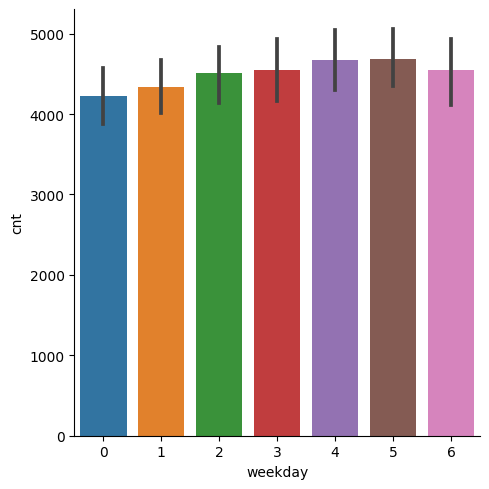

In [51]:
plt.figure(figsize=(10,6))
sns.catplot(x= 'weekday', y ='cnt', data=data, kind='bar');


# mean_number_of_rides = data.groupby('weekday')['cnt'].agg(['mean', 'count'])
# mean_number_of_rides


# plt.figure(figsize=(6,6))
# sns.barplot(data=mean_number_of_rides, x=mean_number_of_rides.index, y=mean_number_of_rides['mean'])
# plt.show()

Now, the X-axis labels isn't very helpful.  Which day is 0?

This is a question about how the data is _coded_. We'll talk more about data encoding next week. Unfortunately, the data documentation doesn't actually say how weekdays are coded!  But we can infer from the data in this case: first data point is January 1, 2011, which was a Saturday, coded as weekday 6; it then resets to 0 for the next day, and starts counting up.

**Always *look* at your data.**

Often, we will not be able to infer the data encoding from the data itself - we need to consult the codebook or data set description. We got lucky this time.  But looking at the data can help us make sense of the codebook.

Let's turn these weekday numbers into a _categorical_ variable so Pandas knows how to label them:

In [58]:
data['day_name'] = pd.Categorical.from_codes(data['weekday'], ['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
data.head()


# mean_number_of_rides.reset_index(inplace=True)

# day_map = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 0: 'Sun'}
# mean_number_of_rides['weekday'] = mean_number_of_rides['weekday'].map(day_map)
# mean_number_of_rides

# plt.figure(figsize=(6,6))
# sns.barplot(data=mean_number_of_rides, x=mean_number_of_rides['weekday'], y=mean_number_of_rides['mean'])
# plt.show()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Sat
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sun
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Mon
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tue
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wed


And if we plot again, Seaborn will use the names:

<Figure size 1000x600 with 0 Axes>

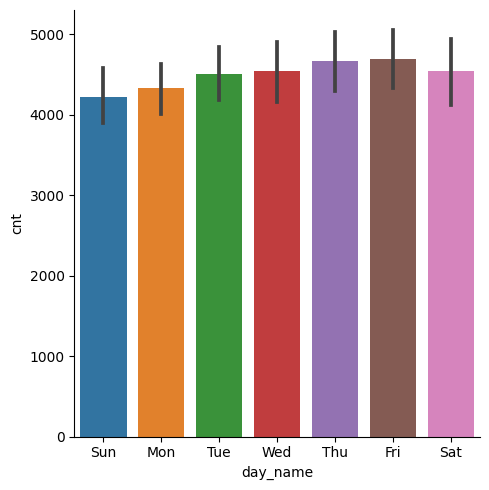

In [59]:
plt.figure(figsize=(10,6))
sns.catplot(x= 'day_name', y ='cnt', data=data, kind='bar');

Congrats! We have now plotted the average rides per day.  When we do not tell [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) what to do with multiple points for the same value (in this case the weekday name), it computes the mean and a bootstrapped 95% confidence interval.  We'll learn what those are in a couple weeks.

## Viewing over Time

We can also try to view what happens to the data over time.  How did rides-per-day change over the course of the data set?

This kind of data - a sequence of data points associated with times - is called a *time series*.  Helpfully, the data set gives us an `instant` column that records the data number since the start of the data set:

<AxesSubplot:xlabel='instant', ylabel='cnt'>

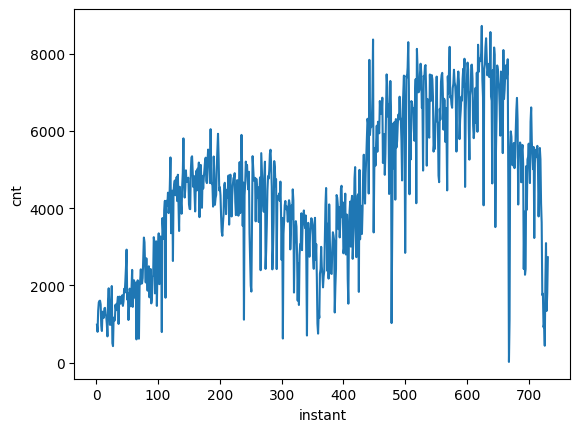

In [61]:
sns.lineplot(data=data, x = 'instant', y = 'cnt')

But we can deal with this as actual times by converting the `dteday` column, which records the date, to a Pandas datetime object, and using that:

In [62]:
data['dt'] = pd.to_datetime(data['dteday'])
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_name,dt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Sat,2011-01-01
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sun,2011-01-02
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Mon,2011-01-03
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tue,2011-01-04
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wed,2011-01-05


<AxesSubplot:xlabel='dt', ylabel='cnt'>

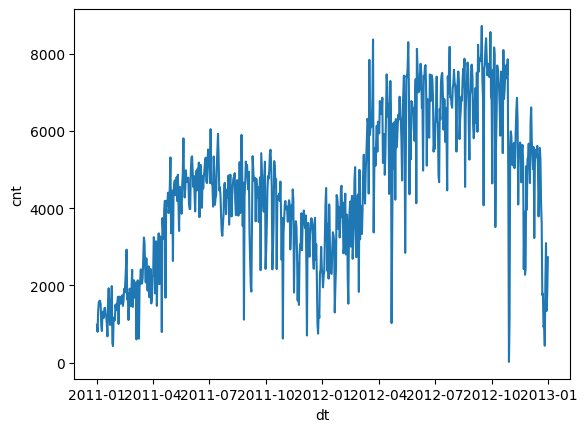

In [63]:
sns.lineplot(data=data, x ='dt', y = 'cnt')

We can also plot the _weekly_ rides by resampling.  Right now, our `bikes` data is indexed by row number in the CSV file.  We can change its index to another column, such as our `dt` column with the date, which then lets us do things like resample by week:

<AxesSubplot:xlabel='dt'>

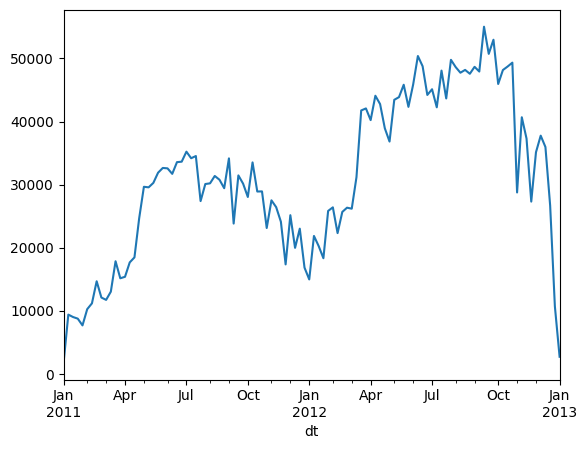

In [65]:
data.set_index('dt')['cnt'].resample('1W').sum().plot()

What that code did, in one line, is:

1. Set the data frame's index to `dt` (`bikes.set_index('dt')`), returning a new DF
2. Select the count column (`['cnt']`), returning a series
3. Resample the series by week (`.resample('1W')`)
4. Combine measurements within each sample by summing them (`.sum()`)
5. Plotting the results using Pandas' defaults (`.plot()`)

Pandas default plotting functions are useful for quick plots to see what's in a data frame or series. They often are difficult to use to turn in to publication-ready charts.

## Finished

That's it, submit your final notebook in Canvas!